In [11]:
import sys
v1, v2 = sys.version[:3].split(".")
v1, v2 = int(v1), int(v2)
if not (v1 == 3 and v2 >= 6 and v2 <= 8):
    raise Exception("YOUR VERSION OF PYTHON IS NOT CORRECT FOR THIS NOTEBOOK\n YOU CAN INSTALL 3.8 AND THEN PIP INSTALL CARBALL")
    

In [8]:
import carball
from carball.json_parser.game import Game

FOLDER = "data/replays/"
replay_file = FOLDER + 'random_replay_example.replay'
json = carball.decompile_replay(replay_path=replay_file)
game = Game()
game.initialize(loaded_json=json)

Found bot not in bot list
Player Buzz as player has no MatchScore.
Score is not found for player
Could not find field_of_view in camera settings for Buzz
Could not find height in camera settings for Buzz
Could not find pitch in camera settings for Buzz
Could not find distance in camera settings for Buzz
Could not find stiffness in camera settings for Buzz
Could not find swivel_speed in camera settings for Buzz
Could not find transition_speed in camera settings for Buzz
Dropping these columns[('Buzz', 'ping'), ('Buzz', 'ball_cam'), ('game', 'is_overtime')]
Goal is not shot: frame 7361 by Have_Forskin


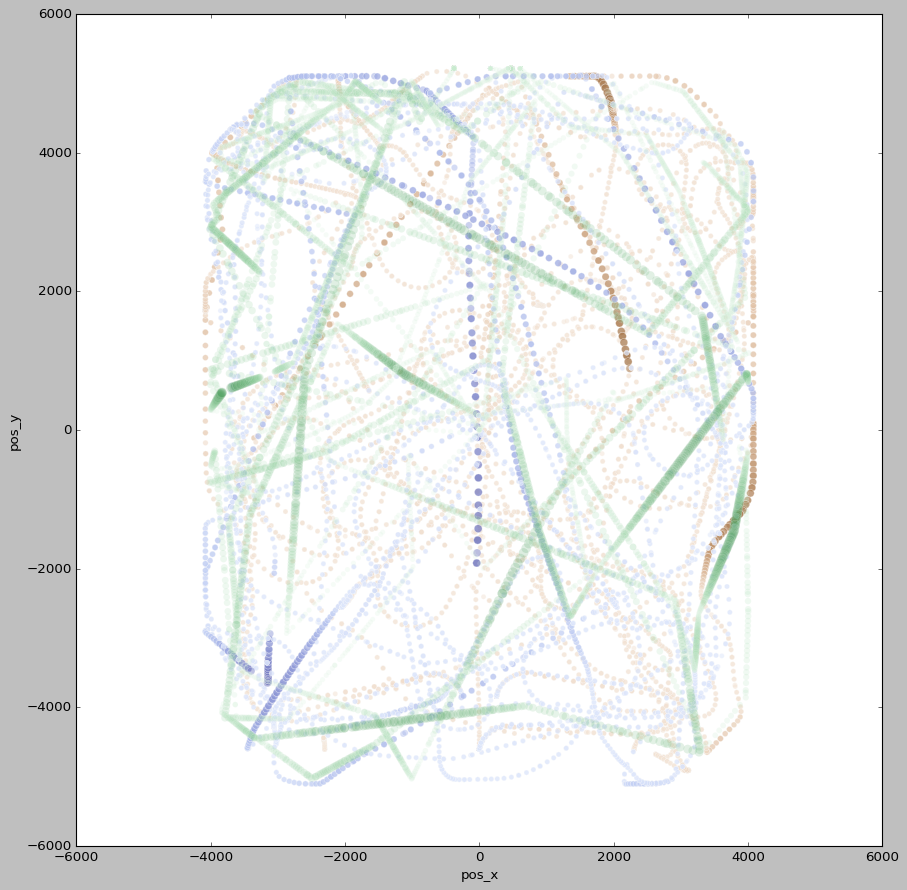

In [305]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(13, 13))

ax.set(xlim=(-6000, 6000), ylim=(-6000, 6000))

selection = {"player1": True, 
             "player2": False, 
             "player3": False, 
             "player4": True, 
             "player5": False, 
             "player6": False, 
             "ball": True}


blue_palette = sns.cubehelix_palette(start=0.1, dark=0.5, light=0.9, hue=1, rot= -0.1, as_cmap=True)
orange_palette = sns.cubehelix_palette(start=1.2, dark=0.5, light=0.9, hue=1, rot= 0, as_cmap=True)
ball_palette = sns.cubehelix_palette(start=2, dark=0.5, light=0.9, hue=1, rot= 0, as_cmap=True)

plt.style.use("classic")
k = 0
for i in range(0,6):
    if selection["player" + str(k + 1)]:
        sns.scatterplot(data = game.players[k].data, 
                    x="pos_x", 
                    y="pos_y", 
                    hue="pos_z", 
                    alpha=0.5, 
                    size="pos_z",
                    sizes=(20, 50),
                    legend=False, 
                    palette= blue_palette if k // 3 > 0 else orange_palette)
    k = (k + 3 + i%2) % 6
    
if selection["ball"]:
    sns.scatterplot(data = game.ball, 
                    x="pos_x", 
                    y="pos_y", 
                    hue="pos_z", 
                    alpha=0.2,
                    size="pos_z",
                    sizes=(20, 80), 
                    legend=False, 
                    palette= ball_palette)